In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import sympy as sy
sy.init_printing() 

In [2]:
def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(sy.Number)})

# <font face="gotham" color="purple"> Systems of First-Order Equations</font>

In time series analysis, we study difference equations by writing them into a linear system. For instance,

$$
3y_{t+3} - 2y_{t+2} + 4y_{t+1} - y_t = 0
$$

We define 

$$
\mathbf{x}_t = 
\left[
\begin{matrix}
y_t\\
y_{t+1}\\
y_{t+2}
\end{matrix}
\right], \qquad
\mathbf{x}_{t+1} = 
\left[
\begin{matrix}
y_{t+1}\\
y_{t+2}\\
y_{t+3}
\end{matrix}
\right]
$$

Rerrange the difference equation for better visual shape,

$$
y_{t+3} = \frac{2}{3}y_{t+2} - \frac{4}{3}y_{t+1} + \frac{1}{3}y_{t}
$$

The difference equation can be rewritten as

$$
\mathbf{x}_{t+1} = A \mathbf{x}_{t}
$$

That is,

$$
\left[
\begin{matrix}
y_{t+1}\\
y_{t+2}\\
y_{t+3}
\end{matrix}
\right] = 
\left[
\begin{matrix}
0 & 1 & 0\\
0 & 0 & 1\\
\frac{1}{3} & -\frac{4}{3} & \frac{2}{3}
\end{matrix}
\right]
\left[
\begin{matrix}
y_t\\
y_{t+1}\\
y_{t+2}
\end{matrix}
\right]
$$

In general, we make sure the difference equation look like:

$$
y_{t+k} = a_1y_{t+k-1} + a_2y_{t+k-2} + ... + a_ky_{t}
$$

then rewrite as $\mathbf{x}_{t+1} = A \mathbf{x}_{t}$, where

$$
\mathbf{x}_t = 
\left[
\begin{matrix}
y_{t}\\
y_{t+1}\\
\vdots\\
y_{t+k-1}
\end{matrix}
\right], \quad
\mathbf{x}_{t+1} = 
\left[
\begin{matrix}
y_{t+1}\\
y_{t+2}\\
\vdots\\
y_{t+k}
\end{matrix}
\right]
$$

And also

$$A=\left[\begin{array}{ccccc}
0 & 1 & 0 & \cdots & 0 \\
0 & 0 & 1 & & 0 \\
\vdots & & & \ddots & \vdots \\
0 & 0 & 0 & & 1 \\
a_{k} & a_{k-1} & a_{k-2} & \cdots & a_{1}
\end{array}\right]$$

# <font face="gotham" color="purple"> Markov Chains</font>

Markov chain is a type of stochastic process, commonly modeled by difference equation, we will be slightly touching the surface of this topic by walking through an example.

Markov chain is also described by the first-order difference equation $\mathbf{x}_{t+1} = P\mathbf{x}_t$, where $\mathbf{x}_t$ is called <font face="gotham" color="red">state vector</font>, $A$ is called <font face="gotham" color="red">stochastic matrix</font>.

Suppose there are 3 cities $A$, $B$ and $C$, the proportion of population migration among cities are constructed in the stochastic matrix below

$$
M = 
\left[
\begin{matrix}
.89 & .07 & .10\\
.07 & .90 & .11\\
.04 & .03 & .79
\end{matrix}
\right]
$$

For instance, the first column means that $89\%$ of population will stay in city $A$, $7\%$ will move to city $B$ and $4\%$ will migrate to city $C$. The first row means $7\%$ of city $B$'s population will immigrate into $A$, $10\%$ of city $C$'s population will immigrate into $A$.

Suppose the initial population of 3 cities are $(593000, 230000, 709000)$, convert the entries into percentage of total population.

In [3]:
x = np.array([593000, 230000, 709000])
x = x/np.sum(x);x

array([0.38707572, 0.15013055, 0.46279373])

Input the stochastic matrix

In [4]:
M = np.array([[.89, .07, .1], [.07, .9, .11], [.04, .03, .79]])

After the first period, the population proportion among cities are

In [5]:
x1 = M@x
x1

array([0.4012859 , 0.2131201 , 0.38559399])

The second period

In [6]:
x2 = M@x1
x2

array([0.41062226, 0.26231345, 0.3270643 ])

The third period

In [7]:
x3 = M@x2
x3

array([0.41652218, 0.30080273, 0.28267509])

We can construct a loop till $\mathbf{x}_{100} = M\mathbf{x}_{99}$, then plot the dynamic path. Notice that the curve is flattening after 20 periods, and we call it <font face="gotham" color="red">convergence to steady-state</font>.

In [8]:
k = 100
X = np.zeros((k, 3))
X[0] = M@x
i = 0

while i+1 < 100:
    X[i+1] = M@X[i]
    i = i + 1

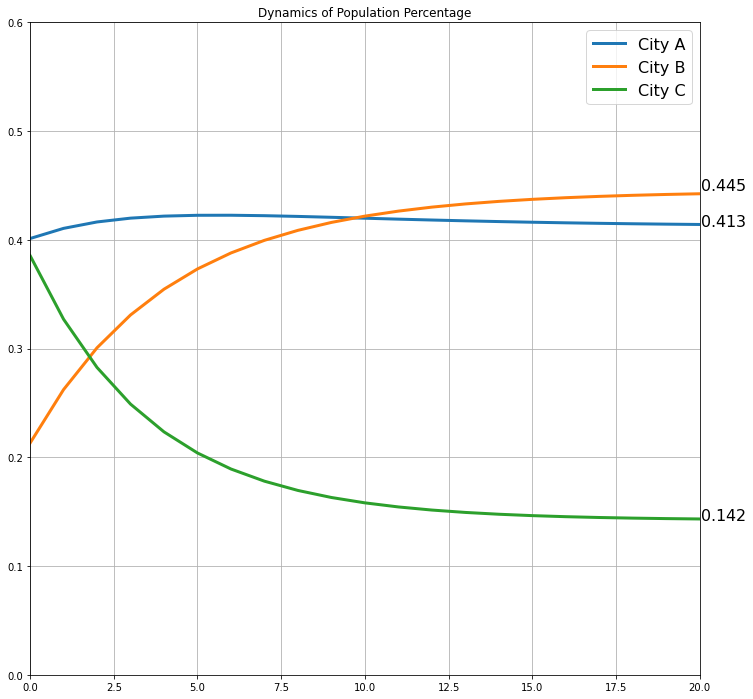

In [9]:
fig, ax = plt.subplots(figsize = (12, 12))

la = ['City A', 'City B', 'City C']
s = '$%.3f$'
for i in [0, 1, 2]:
    ax.plot(X[:, i], lw = 3, label = la[i] )
    ax.text(x = 20, y = X[-1,i], s = s %X[-1,i], size = 16)

ax.axis([0, 20, 0, .6]) # No need to show more of x, it reaches steady-state around 20 periods
ax.legend(fontsize = 16)
ax.grid()
ax.set_title('Dynamics of Population Percentage')
plt.show()

# <font face="gotham" color="purple"> Eigenvalue and -vector in Markov Chain</font>

If the $M$ in last example is diagonalizable, there will be $n$ linearly independent eigenvectors and corresponding eigenvalues, $\lambda_1$,...,$\lambda_n$. And eigenvalues can always be arranged so that $\left|\lambda_{1}\right| \geq\left|\lambda_{2}\right| \geq \cdots \geq\left|\lambda_{n}\right|$. 

Also, because any initial vector $\mathbb{x}_0 \in \mathbb{R}^n$, we can use the basis of eigenspace (eigenvectors) to represent all $\mathbf{x}$.

$$
\mathbf{x}_{0}=c_{1} \mathbf{v}_{1}+\cdots+c_{n} \mathbf{v}_{n}
$$

This is called <font face="gotham" color="red">eigenvector decomposition</font> of $\mathbf{x}_0$. Multiply by $A$

$$
\begin{aligned}
\mathbf{x}_{1}=A \mathbf{x}_{0} &=c_{1} A \mathbf{v}_{1}+\cdots+c_{n} A \mathbf{v}_{n} \\
&=c_{1} \lambda_{1} \mathbf{v}_{1}+\cdots+c_{n} \lambda_{n} \mathbf{v}_{n}
\end{aligned}
$$

In general, we have a formula for $\mathbf{x}_k$

$$
\mathbf{x}_{k}=c_{1}\left(\lambda_{1}\right)^{k} \mathbf{v}_{1}+\cdots+c_{n}\left(\lambda_{n}\right)^{k} \mathbf{v}_{n}
$$

Now we test if $M$ has $n$ linearly independent eigvectors.

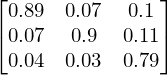

In [10]:
M = sy.Matrix([[.89, .07, .1], [.07, .9, .11], [.04, .03, .79]]);M

In [11]:
M.is_diagonalizable()

True

$M$ is diagonalizable, which also means that $M$ has $n$ linearly independent eigvectors.

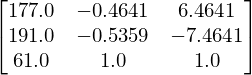

In [12]:
P, D = M.diagonalize()
P = round_expr(P,4); P # user-defined round function at the top of the notebook

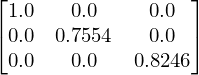

In [13]:
D = round_expr(D,4); D

First we find the $\big[\mathbf{x}_0\big]_C$, i.e. $c_1, c_2, c_3$

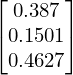

In [14]:
x0 = sy.Matrix([[.3870], [.1501], [0.4627]]);x0

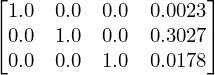

In [15]:
P_aug = P.row_join(x0)
P_aug_rref = round_expr(P_aug.rref()[0],4); P_aug_rref

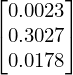

In [16]:
c = sy.zeros(3, 1)
for i in [0, 1, 2]:
    c[i] = P_aug_rref[i, 3]
c = round_expr(c,4);c 

Now we can use the formula to compute $\mathbf{x}_{100}$, it is the same as we have plotted in the graph.

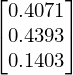

In [17]:
x100 = c[0] * D[0, 0]**100 * P[:, 0]\
+ c[1] * D[1, 1]**100 * P[:, 1]\
+ c[2] * D[2, 2]**100 * P[:, 2]
x100 = round_expr(x100,4);x100 

This is close enough to the steady-state.

# <font face="gotham" color="purple"> Fractal Pictures</font>

Here is an example of fractal geometry, illustrating how dynamic system and affine transformation can create fractal pictures.

The algorithem is perform 4 types of affine transformation. The corresponding probabilites are $p_1, p_2, p_3, p_4$.

$$
\begin{array}{l}
T_{1}\left(\left[\begin{array}{l}
x \\
y
\end{array}\right]\right)=\left[\begin{array}{rr}
0.86 & 0.03 \\
-0.03 & 0.86
\end{array}\right]\left[\begin{array}{l}
x \\
y
\end{array}\right]+\left[\begin{array}{l}
0 \\
1.5
\end{array}\right], p_{1}=0.83 \\
T_{2}\left(\left[\begin{array}{l}
x \\
y
\end{array}\right]\right)=\left[\begin{array}{lr}
0.2 & -0.25 \\
0.21 & 0.23
\end{array}\right]\left[\begin{array}{l}
x \\
y
\end{array}\right]+\left[\begin{array}{l}
0 \\
1.5
\end{array}\right], p_{2}=0.09 \\
T_{3}\left(\left[\begin{array}{l}
x \\
y
\end{array}\right]\right)=\left[\begin{array}{rr}
-0.15 & 0.27 \\
0.25 & 0.26
\end{array}\right]\left[\begin{array}{l}
x \\
y
\end{array}\right]+\left[\begin{array}{l}
0 \\
0.45
\end{array}\right], p_{3}=0.07 \\
T_{4}\left(\left[\begin{array}{l}
x \\
y
\end{array}\right]\right)=\left[\begin{array}{ll}
0 & 0 \\
0 & 0.17
\end{array}\right]\left[\begin{array}{l}
x \\
y
\end{array}\right]+\left[\begin{array}{l}
0 \\
0
\end{array}\right], p_{4}=0.01
\end{array}
$$

The codes below are self-explanatory.

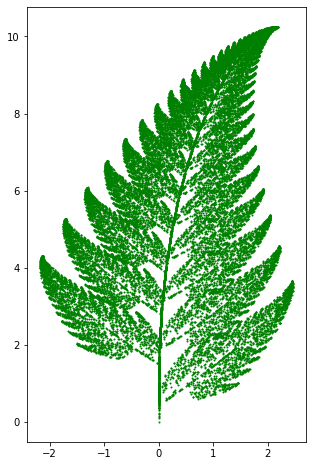

In [18]:
A = np.array([[[.86, .03],
              [-.03, .86]],
             [[.2, -.25],
              [.21, .23]],
             [[-.15, .27],
              [.25, .26]],
             [[0., 0.],
              [0., .17]]])
a = np.array([[[0,1.5]],
             [[0,1.5]],
             [[0,0.45]],
             [[0,0]]])

p1 = 1*np.ones(83)
p2 = 2*np.ones(9)
p3 = 3*np.ones(7)
p4 = 4*np.ones(1)
p = np.hstack((p1,p2,p3,p4))

k = 30000
fig, ax = plt.subplots(figsize = (5,8))
X = np.zeros((2,k))
for i in range(k-1):
    n = np.random.randint(0, 100)
    if p[n] == 1:
        X[:,i+1] = A[0,:,:]@X[:,i]+a[0,:,:]
    elif p[n] == 2:
        X[:,i+1]  = A[1,:,:]@X[:,i]+a[1,:,:]
    elif p[n] == 3:
        X[:,i+1]  = A[2,:,:]@X[:,i]+a[2,:,:]
    else:
        X[:,i+1]  = A[3,:,:]@X[:,i]+a[3,:,:]
ax.scatter(X[0,:],X[1,:], s = 1, color = 'g')
plt.show()